## *03. Análisis exploratorio de los datos*

* El análisis exploratorio de datos es una técnica utilizada en la estadística y en la ciencia de datos que se utiliza para examinar, resumir y visualizar las características clave de un conjunto de datos. Su objetivo es descubrir patrones, relaciones, tendencias y anomalías en los datos de una manera visual e intuitiva.

* El análisis exploratorio de datos se realiza mediante la aplicación de diversas técnicas estadísticas y gráficas, como histogramas, diagramas de dispersión, diagramas de caja, diagramas de barras, mapas de calor, entre otros. Estas técnicas se utilizan para resumir los datos y visualizar las relaciones entre las diferentes variables en el conjunto de datos.

* El análisis exploratorio de datos puede ayudar a los analistas de datos a comprender mejor la estructura de los datos, identificar patrones y anomalías en los datos, y descubrir relaciones entre las variables. Además, puede ayudar a los analistas a detectar y corregir errores y valores atípicos en los datos.

In [6]:
import warnings
import sys
sys.path.append('../src/utils')

# Core
from utils_functions import *
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
warnings.simplefilter('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Lectura de los datos
data = pd.read_csv('../data/interim/data_preprocessed.csv')
data.sample(5, random_state=777)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24653,36,local-gov,331902,some-college,10,divorced,adm-clerical,unmarried,white,female,0,0,35,united-states,<=50k
23838,63,?,221592,hs-grad,9,married-civ-spouse,?,husband,white,male,0,0,40,united-states,>50k
25940,32,private,27207,10th,6,never-married,craft-repair,not-in-family,white,male,0,0,50,united-states,<=50k
32101,21,private,119156,hs-grad,9,never-married,craft-repair,own-child,white,male,0,0,40,united-states,<=50k
18027,34,federal-gov,172716,12th,8,married-civ-spouse,armed-forces,husband,white,male,0,0,40,united-states,<=50k


In [3]:
# Dimensiones del dataset
print(f'Número de muestras: {data.shape[0]}')
print(f'Predictores: {data.shape[1]}\n')
data.info()

Número de muestras: 32537
Predictores: 15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### *Tipos de variables*
En estadística y análisis de datos, los tipos de variables se refieren a las diferentes categorías o clasificaciones que se pueden aplicar a una variable o conjunto de datos. Las variables se pueden clasificar en varios tipos principales, que incluyen:

1. **Variables continuas**: Son variables que representan valores numéricos que se pueden medir y que pueden tomar cualquier valor en un rango continuo. Por ejemplo, la altura, el peso o la edad.

2. **Variables categóricas**: Son variables que representan categorías o clases que no tienen un orden específico. Por ejemplo, el género, el color de ojos o la marca de un automóvil.

3. **Variables discretas**: Son variables que representan valores numéricos que se pueden contar. Por ejemplo, el número de hijos de una familia, el número de estudiantes en una clase.

4. **Variables temporales**: Son variables que representan medidas o valores que varían en el tiempo. Estas variables son comunes en muchas áreas, como la economía, las finanzas, la meteorología, la ingeniería, entre otras.

In [13]:
# Función para capturar los tipos de variables
continuous, categoricals, discretes, temporaries = capture_variables(data=data)

		Tipos de variables
Hay 6 variables continuas
Hay 0 variables discretas
Hay 0 variables temporales
Hay 9 variables categóricas


### *Valores faltantes*

* Los valores faltantes (también conocidos como valores nulos o valores perdidos) son datos que faltan o no se han registrado en un conjunto de datos. Pueden surgir por diversas razones, como errores en la recopilación de datos, problemas técnicos durante la transferencia de datos o simplemente porque los datos no estaban disponibles en el momento de la recopilación.

* Los valores faltantes pueden presentarse en cualquier tipo de datos, ya sea en una tabla de datos, una base de datos o un archivo de texto. Estos valores pueden ser representados de diferentes maneras, dependiendo del formato de datos utilizado. Por ejemplo, en una tabla de datos, se puede representar con una celda vacía, con un signo de interrogación o con un valor predeterminado como "NA" o "NaN" en algunos lenguajes de programación.

* Los valores faltantes pueden tener un impacto significativo en el análisis de datos, ya que pueden alterar los resultados de los análisis y los modelos de aprendizaje automático. Por lo tanto, es importante identificar y manejar los valores faltantes antes de realizar cualquier tipo de análisis de datos. Esto se puede hacer mediante técnicas de imputación, como la imputación de media o mediana, la imputación basada en modelos o la eliminación de las filas o columnas con valores faltantes.

In [14]:
# Graficando los valores faltantes
plotting_nan_values(data)

No se encontraron variables con nulos


### *Estadísticos descriptivos*
Los estadísticos descriptivos son un conjunto de medidas numéricas que se utilizan para resumir y describir características clave de un conjunto de datos. Estas medidas proporcionan información importante sobre la distribución, la tendencia central, la variabilidad y la forma de los datos.

Algunos de los estadísticos descriptivos más comunes incluyen:

* Media: es el promedio aritmético de los valores en un conjunto de datos.
* Mediana: es el valor central en un conjunto de datos ordenado.
* Moda: es el valor más común en un conjunto de datos.
* Desviación estándar: es una medida de la variabilidad de los valores en un conjunto de datos.
* Rango: es la diferencia entre el valor máximo y mínimo en un conjunto de datos.
* Percentiles: son valores que dividen un conjunto de datos en partes iguales.

In [15]:
# Resumen estadístico de variables continuas
data[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
age,"32,537.00",38.59,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,"32,537.00","189,780.85","105,556.47","12,285.00","117,827.00","178,356.00","236,993.00","1,484,705.00"
education-num,"32,537.00",10.08,2.57,1.00,9.00,10.00,12.00,16.00
capital-gain,"32,537.00","1,078.44","7,387.96",0.00,0.00,0.00,0.00,"99,999.00"
capital-loss,"32,537.00",87.37,403.10,0.00,0.00,0.00,0.00,"4,356.00"
hours-per-week,"32,537.00",40.44,12.35,1.00,40.00,40.00,45.00,99.00


### **Correlaciones**
Las correlaciones son medidas que indican la fuerza y la dirección de la relación entre dos variables. La correlación puede ser positiva, lo que significa que las variables se mueven en la misma dirección, o negativa, lo que significa que se mueven en direcciones opuestas. Una correlación de cero indica que no hay relación entre las variables.

#### *Matriz de correlaciones*
* La matriz de correlación es útil para entender cómo se relacionan las variables en un conjunto de datos. Puede ayudar a identificar patrones o relaciones interesantes entre las variables y puede ser una herramienta importante para la selección de características. Por ejemplo, si dos variables están altamente correlacionadas, es posible que una de ellas no aporte información adicional al modelo y se pueda eliminar para simplificar el conjunto de datos y mejorar el rendimiento del modelo.

* La matriz de correlación también puede ser utilizada para detectar multicolinealidad, que es cuando dos o más variables están altamente correlacionadas entre sí. La multicolinealidad puede causar problemas en algunos modelos de aprendizaje automático, por lo que es importante detectarla y tratarla adecuadamente.

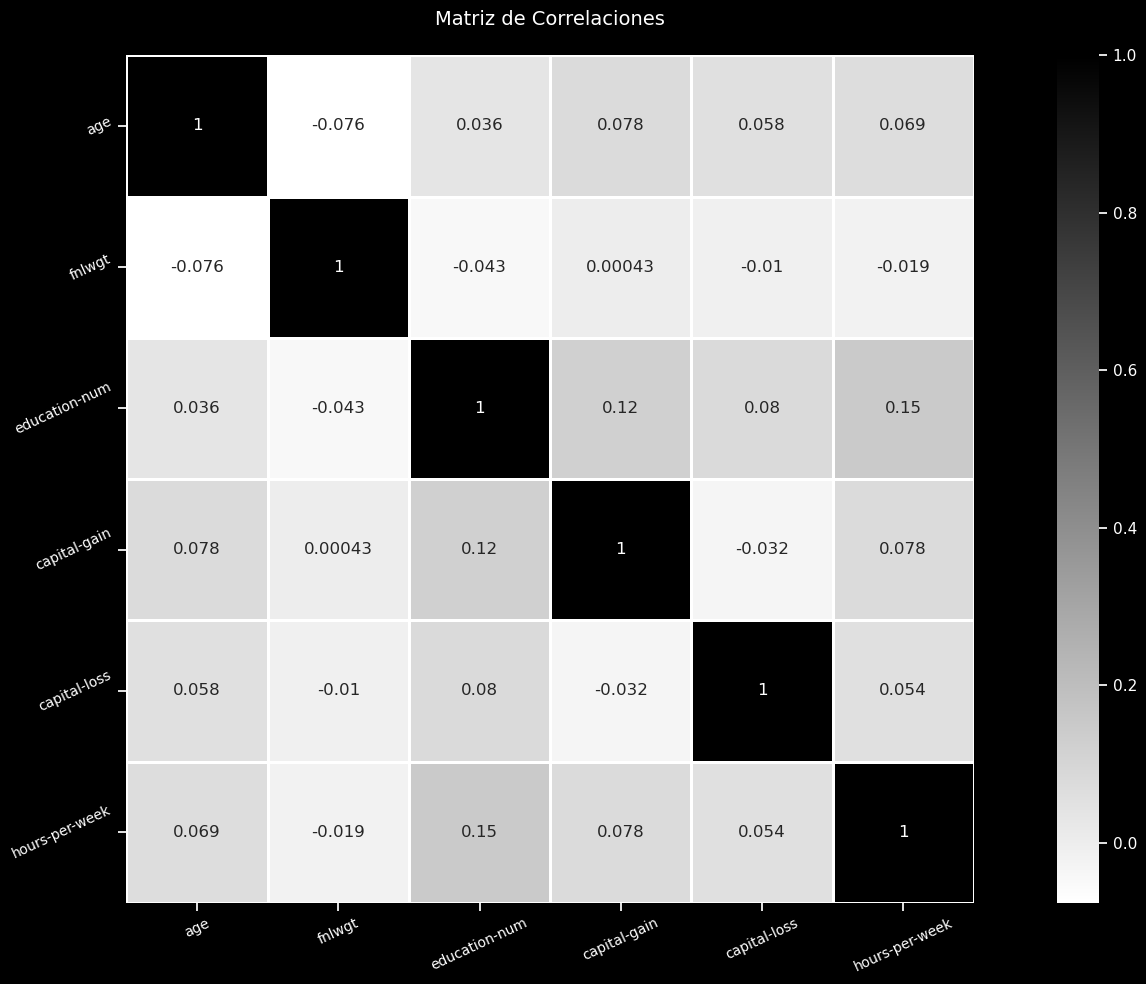

In [16]:
# Correlación entre predictores
%matplotlib inline
correlation_matrix(data=data, continuous=continuous)

### **Covarianzas**
La covarianza es una medida que indica la relación entre dos variables aleatorias. Es una medida de cómo dos variables cambian juntas. Si la covarianza es positiva, significa que las variables tienden a cambiar en la misma dirección. Si es negativa, significa que cambian en direcciones opuestas. Si la covarianza es cero, significa que no hay relación entre las variables.

#### *Matriz de covarianzas*
La matriz de covarianza es útil para entender cómo se relacionan las variables en un conjunto de datos. Al igual que la matriz de correlación, puede ayudar a identificar patrones o relaciones interesantes entre las variables. Sin embargo, la covarianza no está normalizada, lo que significa que su valor absoluto puede ser difícil de interpretar. Además, las unidades de la covarianza son el producto de las unidades de las dos variables, lo que puede dificultar la comparación de covarianzas entre diferentes pares de variables.

In [17]:
# Función para obtener una matriz de covarianza entre los predictores
covariance_matrix(data[continuous])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,,Negativo,Positivo,Positivo,Positivo,Positivo
fnlwgt,Negativo,,Negativo,Positivo,Negativo,Negativo
education-num,Positivo,Negativo,,Positivo,Positivo,Positivo
capital-gain,Positivo,Positivo,Positivo,,Negativo,Positivo
capital-loss,Positivo,Negativo,Positivo,Negativo,,Positivo
hours-per-week,Positivo,Negativo,Positivo,Positivo,Positivo,


### *Análisis Univariado*
* El análisis univariado es un tipo de análisis de datos en el que se examina una sola variable a la vez. En otras palabras, se trata de analizar las características o propiedades de una variable de manera aislada, sin tener en cuenta ninguna relación con otras variables.

* El análisis univariado es una técnica común en estadística descriptiva y se utiliza para resumir y visualizar las características de una variable. Por ejemplo, se puede utilizar el análisis univariado para calcular medidas de tendencia central, como la media o la mediana, o para calcular medidas de dispersión, como la desviación estándar o el rango.

* El análisis univariado también se utiliza en la exploración de datos para identificar valores atípicos o valores extremos, y para detectar cualquier problema con los datos, como valores faltantes o valores incorrectos.

#### *Continuas*

* El **sesgo** se refiere a la tendencia de una distribución a desviarse hacia un lado u otro de la media. Una distribución simétrica tendrá un **sesgo** de cero, mientras que una distribución asimétrica tendrá un **sesgo** positivo o negativo. Un **sesgo** positivo indica que la cola de la distribución se extiende más hacia la derecha que hacia la izquierda, mientras que un **sesgo** negativo indica que la cola se extiende más hacia la izquierda que hacia la derecha.

* La **kurtosis**, por otro lado, mide la concentración de los datos alrededor de la media. Una distribución con una **kurtosis** alta tendrá una concentración de datos en la región central y colas más pesadas, mientras que una distribución con una **kurtosis** baja tendrá una concentración de datos más uniforme a lo largo de la distribución y colas más ligeras.

* Los **valores atípicos**, también conocidos como outliers en inglés, son valores que se alejan significativamente del resto de los datos en un conjunto de datos. En otras palabras, son valores extremos que están muy por encima o por debajo del rango típico de los demás valores en el conjunto de datos.

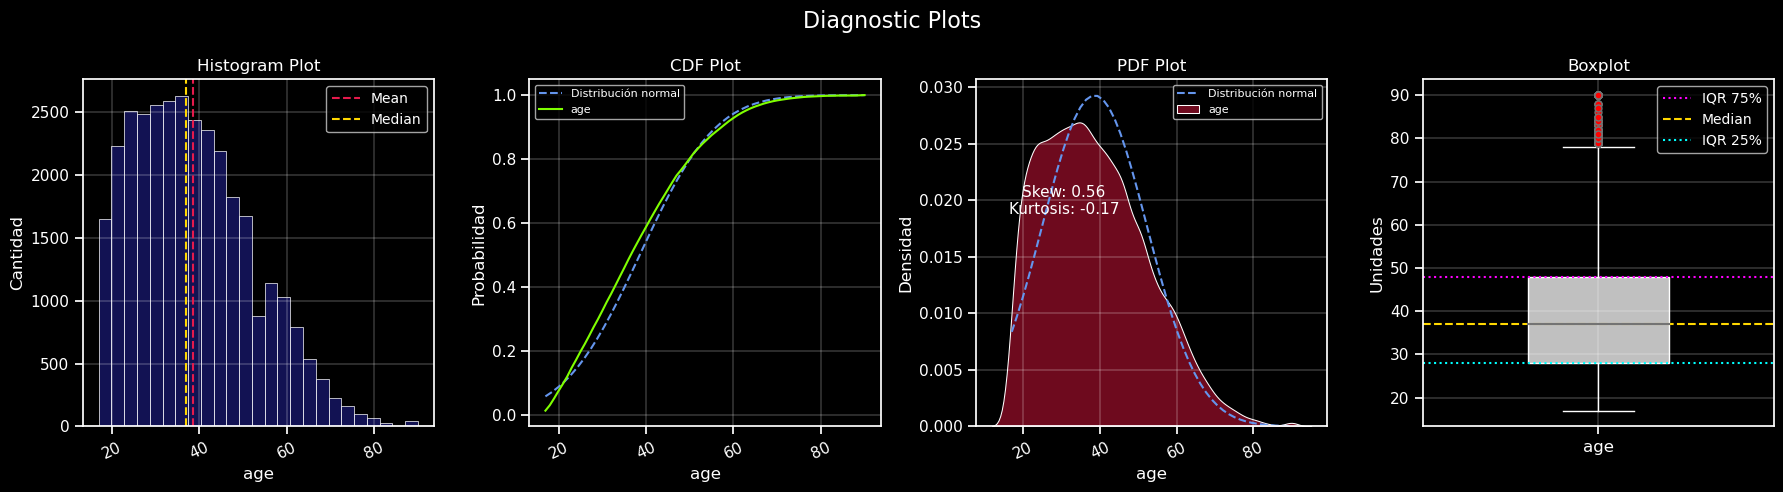

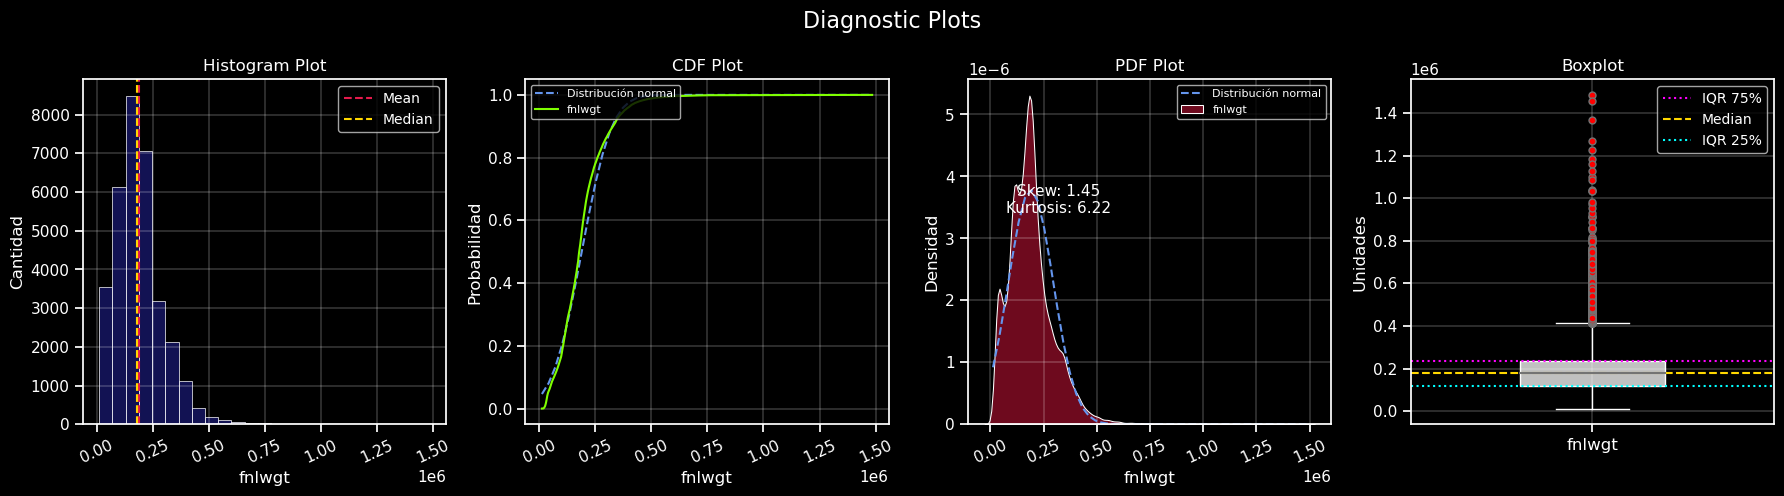

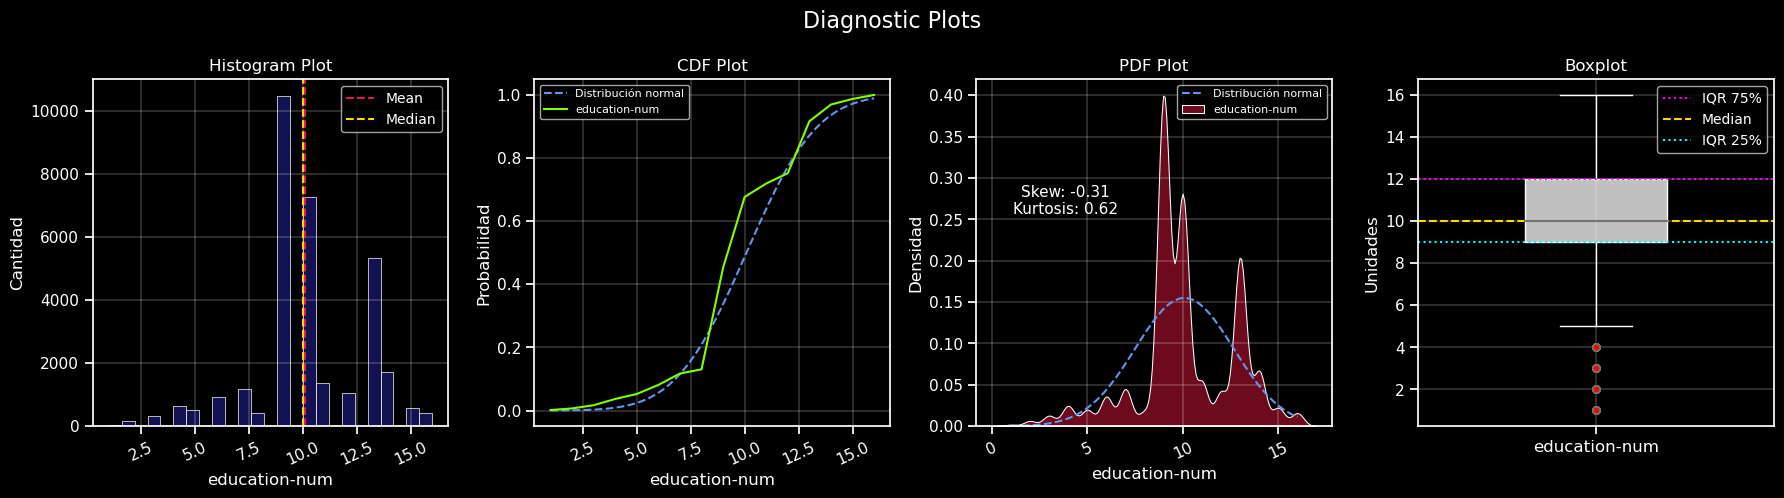

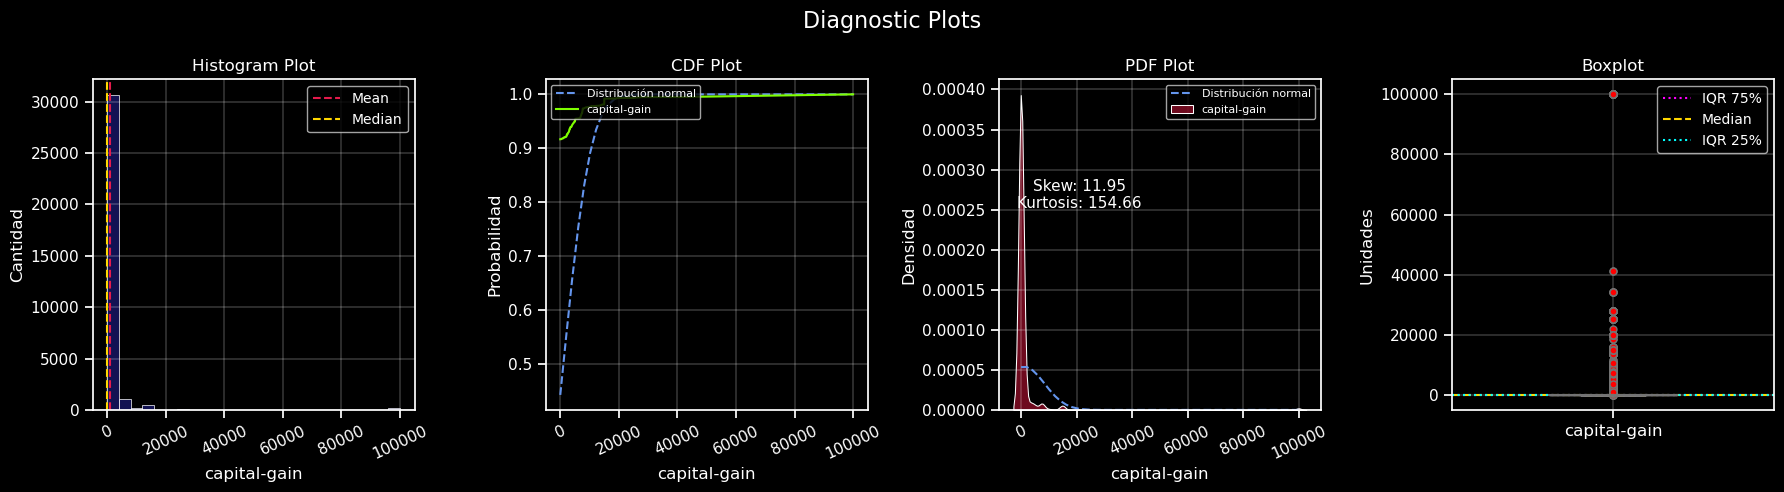

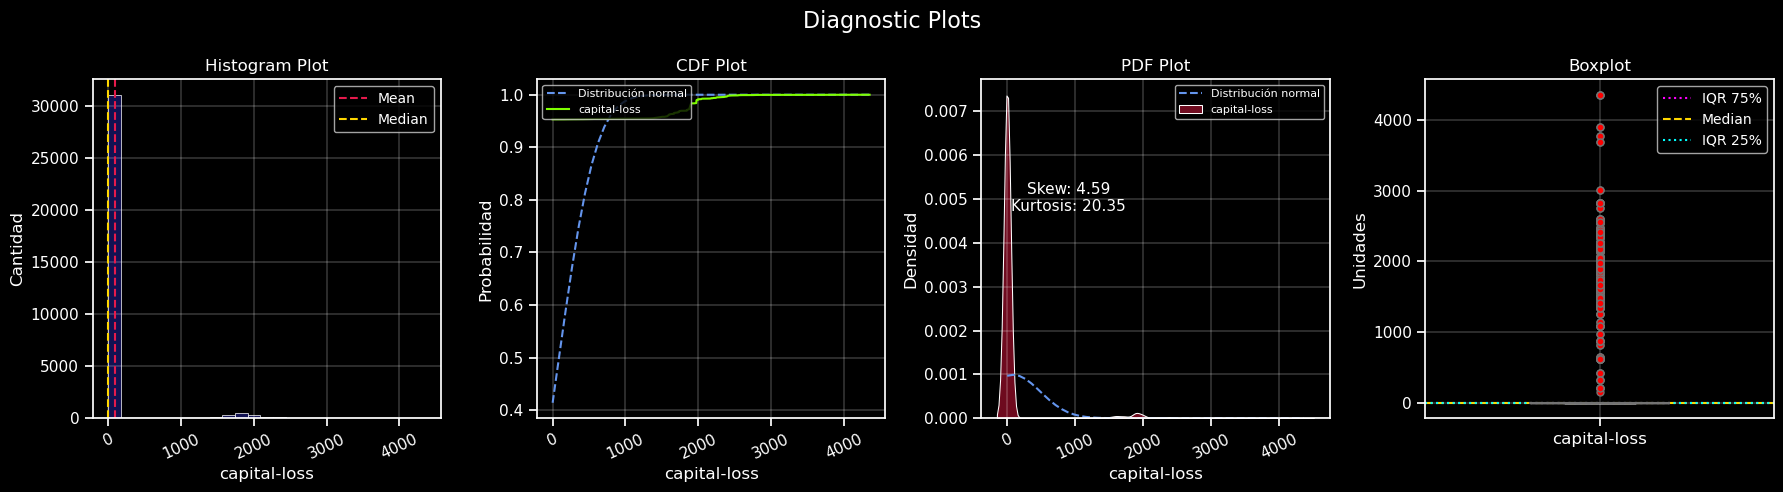

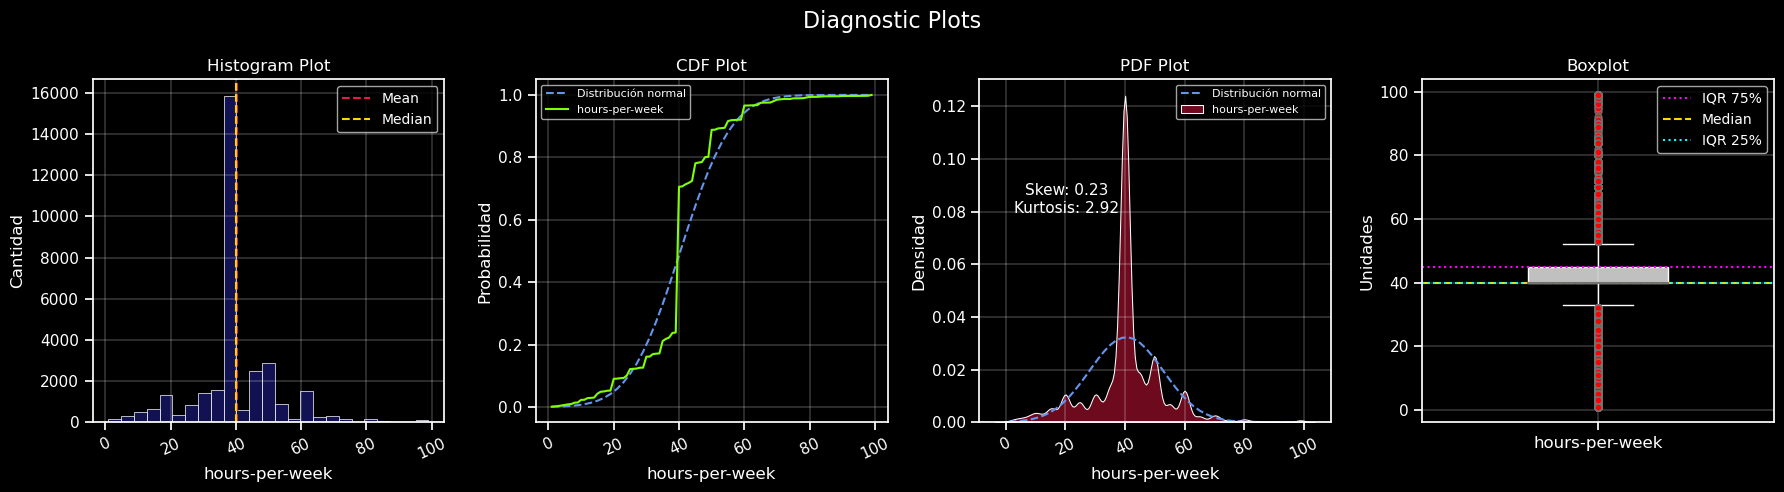

In [18]:
# Función para observar el comportamiento de variables continuas
diagnostic_plots(data=data, variables=continuous)

### *Análisis bivariado*

* El análisis bivariado es una técnica estadística utilizada para analizar la relación entre dos variables cuantitativas o cualitativas. En otras palabras, el análisis bivariado permite evaluar la relación entre dos variables, examinando cómo los cambios en una variable afectan a la otra.

* El análisis bivariado puede ser utilizado para responder preguntas como:

    * ¿Existe una relación entre el ingreso y el nivel educativo?
    * ¿Hay alguna relación entre la edad y la frecuencia de uso de una aplicación de redes sociales?
    * ¿Hay una correlación entre el tiempo de espera en la cola de un restaurante y la satisfacción del cliente?

#### *Análisis de covarianzas*

* El análisis de covarianzas, también conocido como ANCOVA (por sus siglas en inglés), es una técnica estadística utilizada para analizar la relación entre una variable independiente categórica y una variable dependiente continua, mientras se controlan los efectos de una o más variables de covarianza (también llamadas variables de control o variables confusoras).

* La covarianza es una medida estadística que indica cómo dos variables se relacionan entre sí. En el análisis de covarianzas, la covarianza se utiliza para evaluar la relación entre la variable independiente categórica y la variable dependiente continua, mientras se controla el efecto de las variables de covarianza.

* El análisis de covarianzas es utilizado en diversas áreas, incluyendo la psicología, la medicina, la educación y las ciencias sociales. Es una herramienta importante para entender la relación entre variables y puede ayudar a informar la toma de decisiones en diversas situaciones.

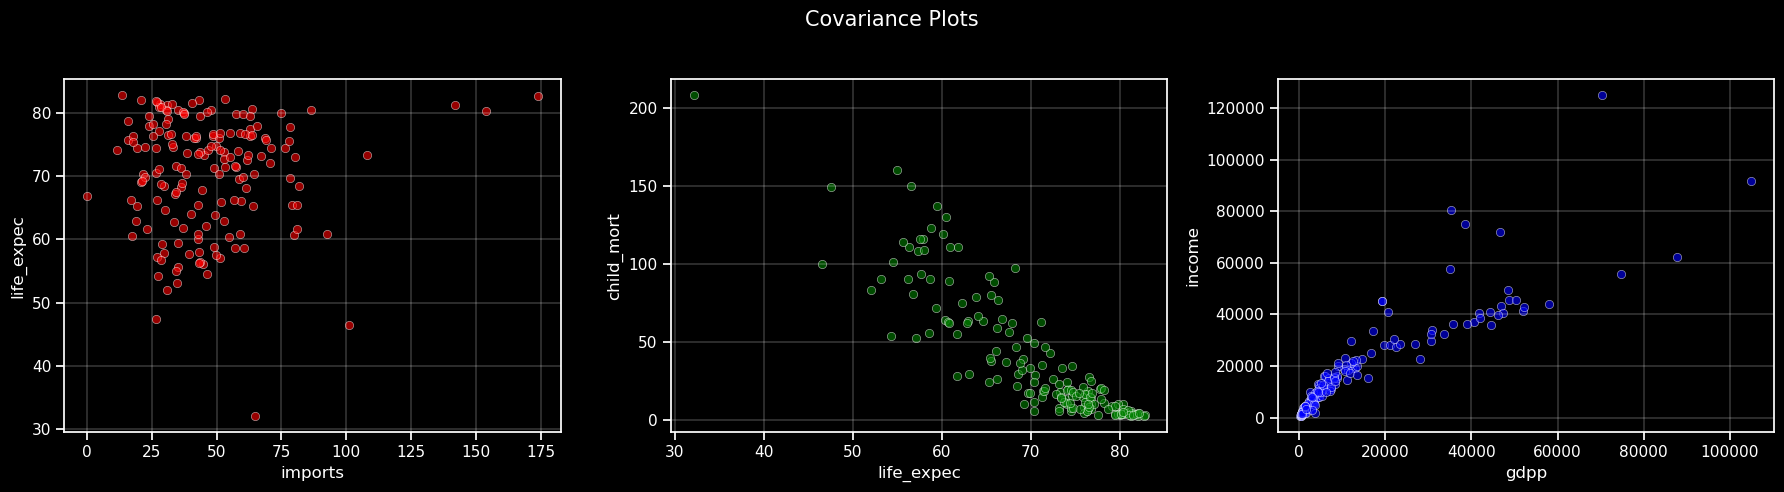

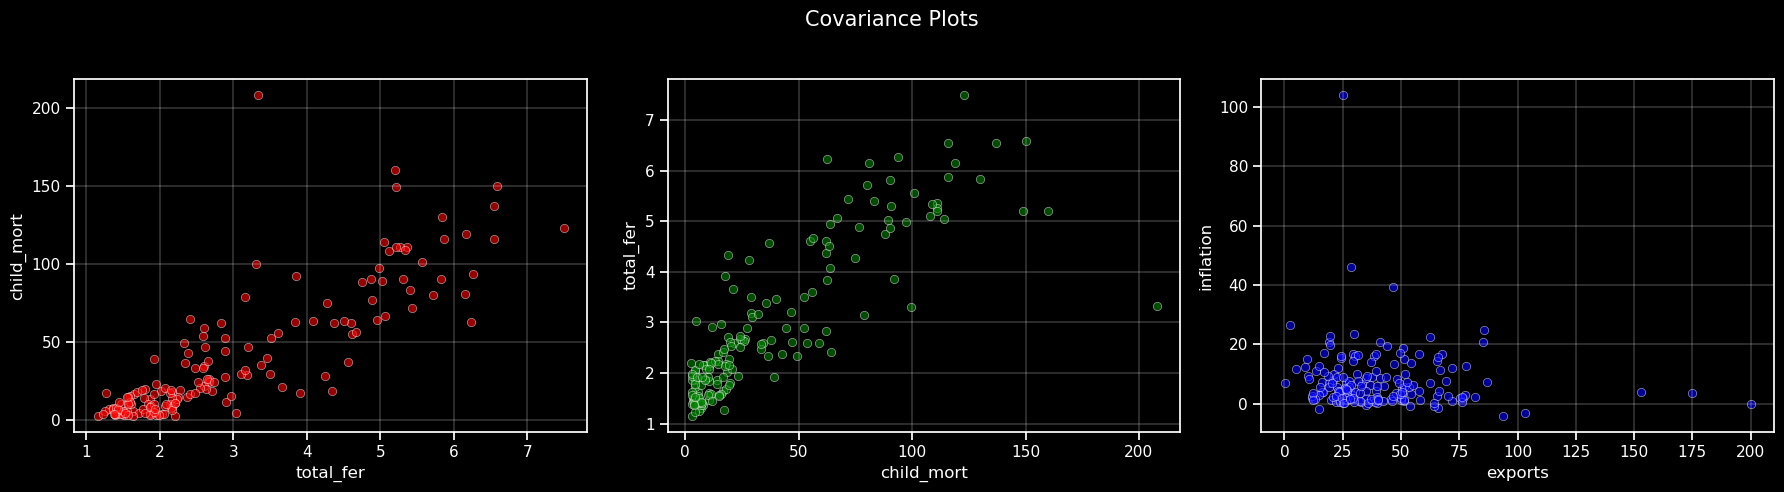

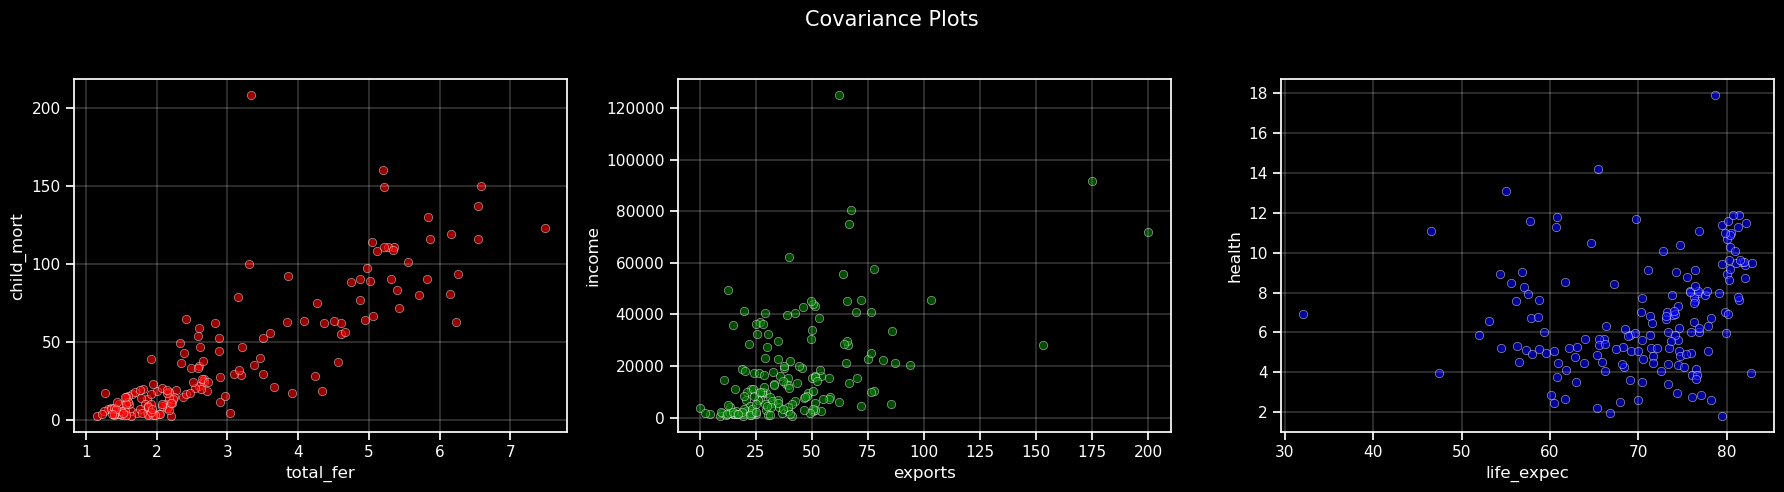

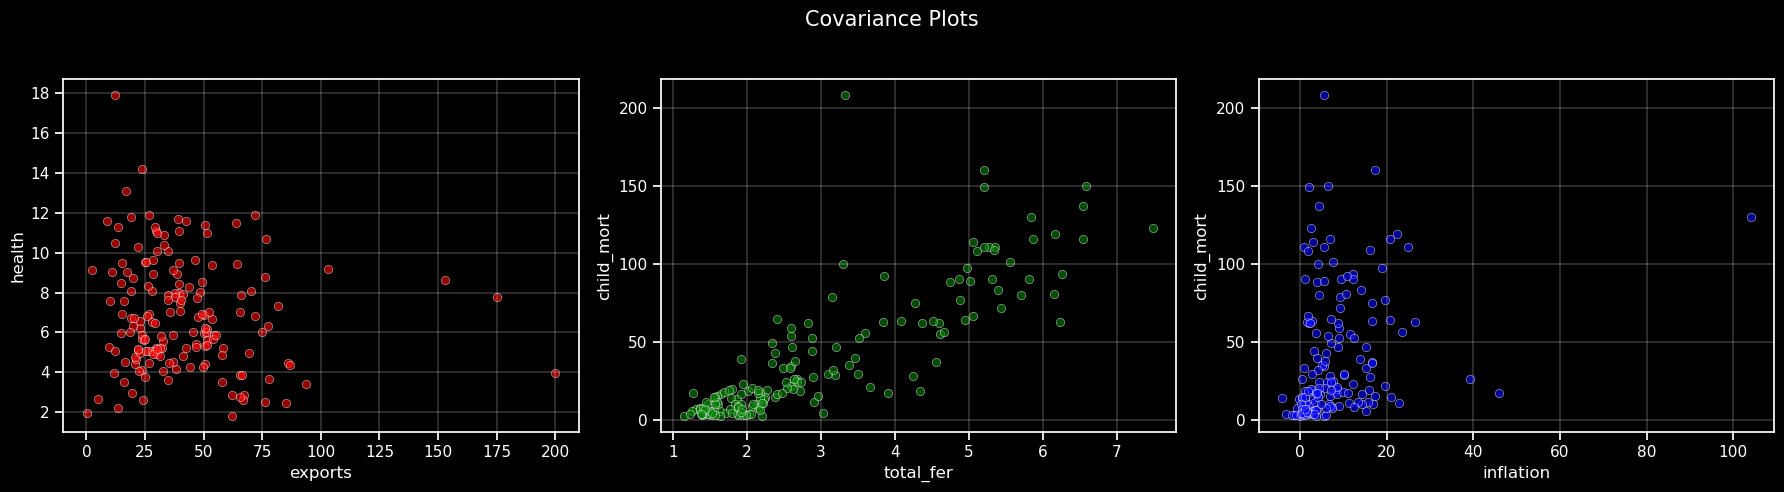

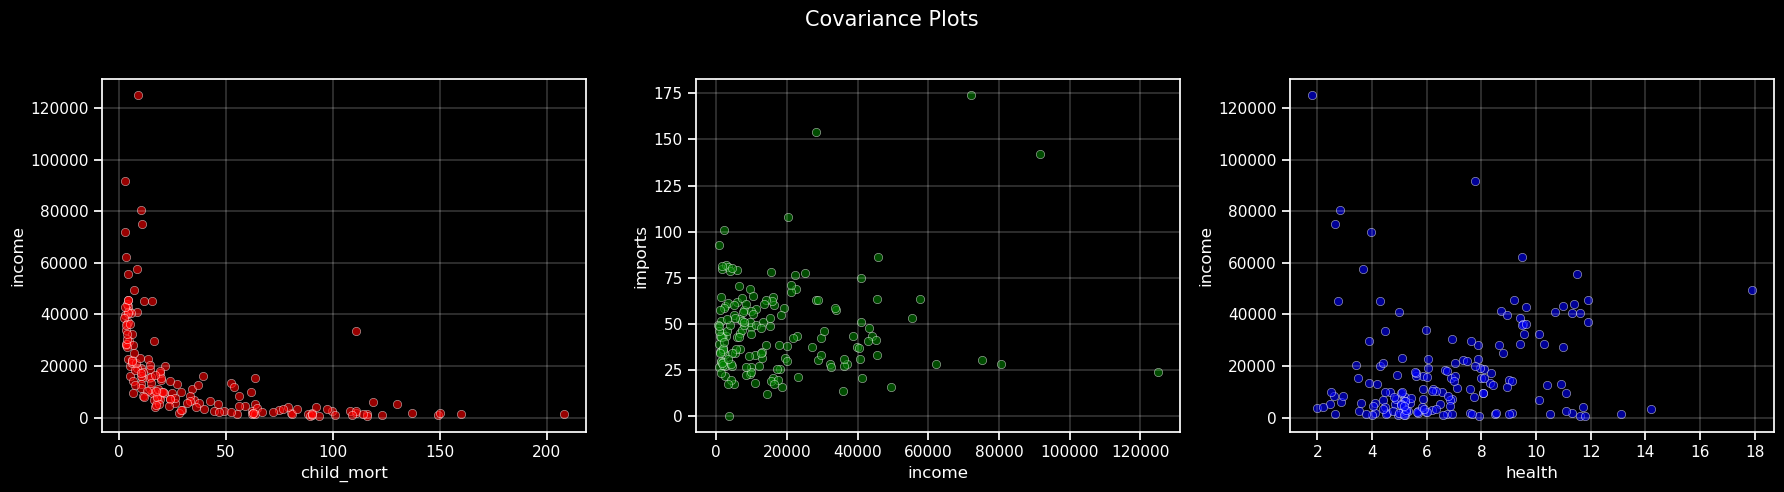

In [11]:
# Función para graficar la covarianzas entre los predictores
plotting_covariance(X=data, continuous=continuous, n_iter=5)

<IPython.core.display.Latex object>

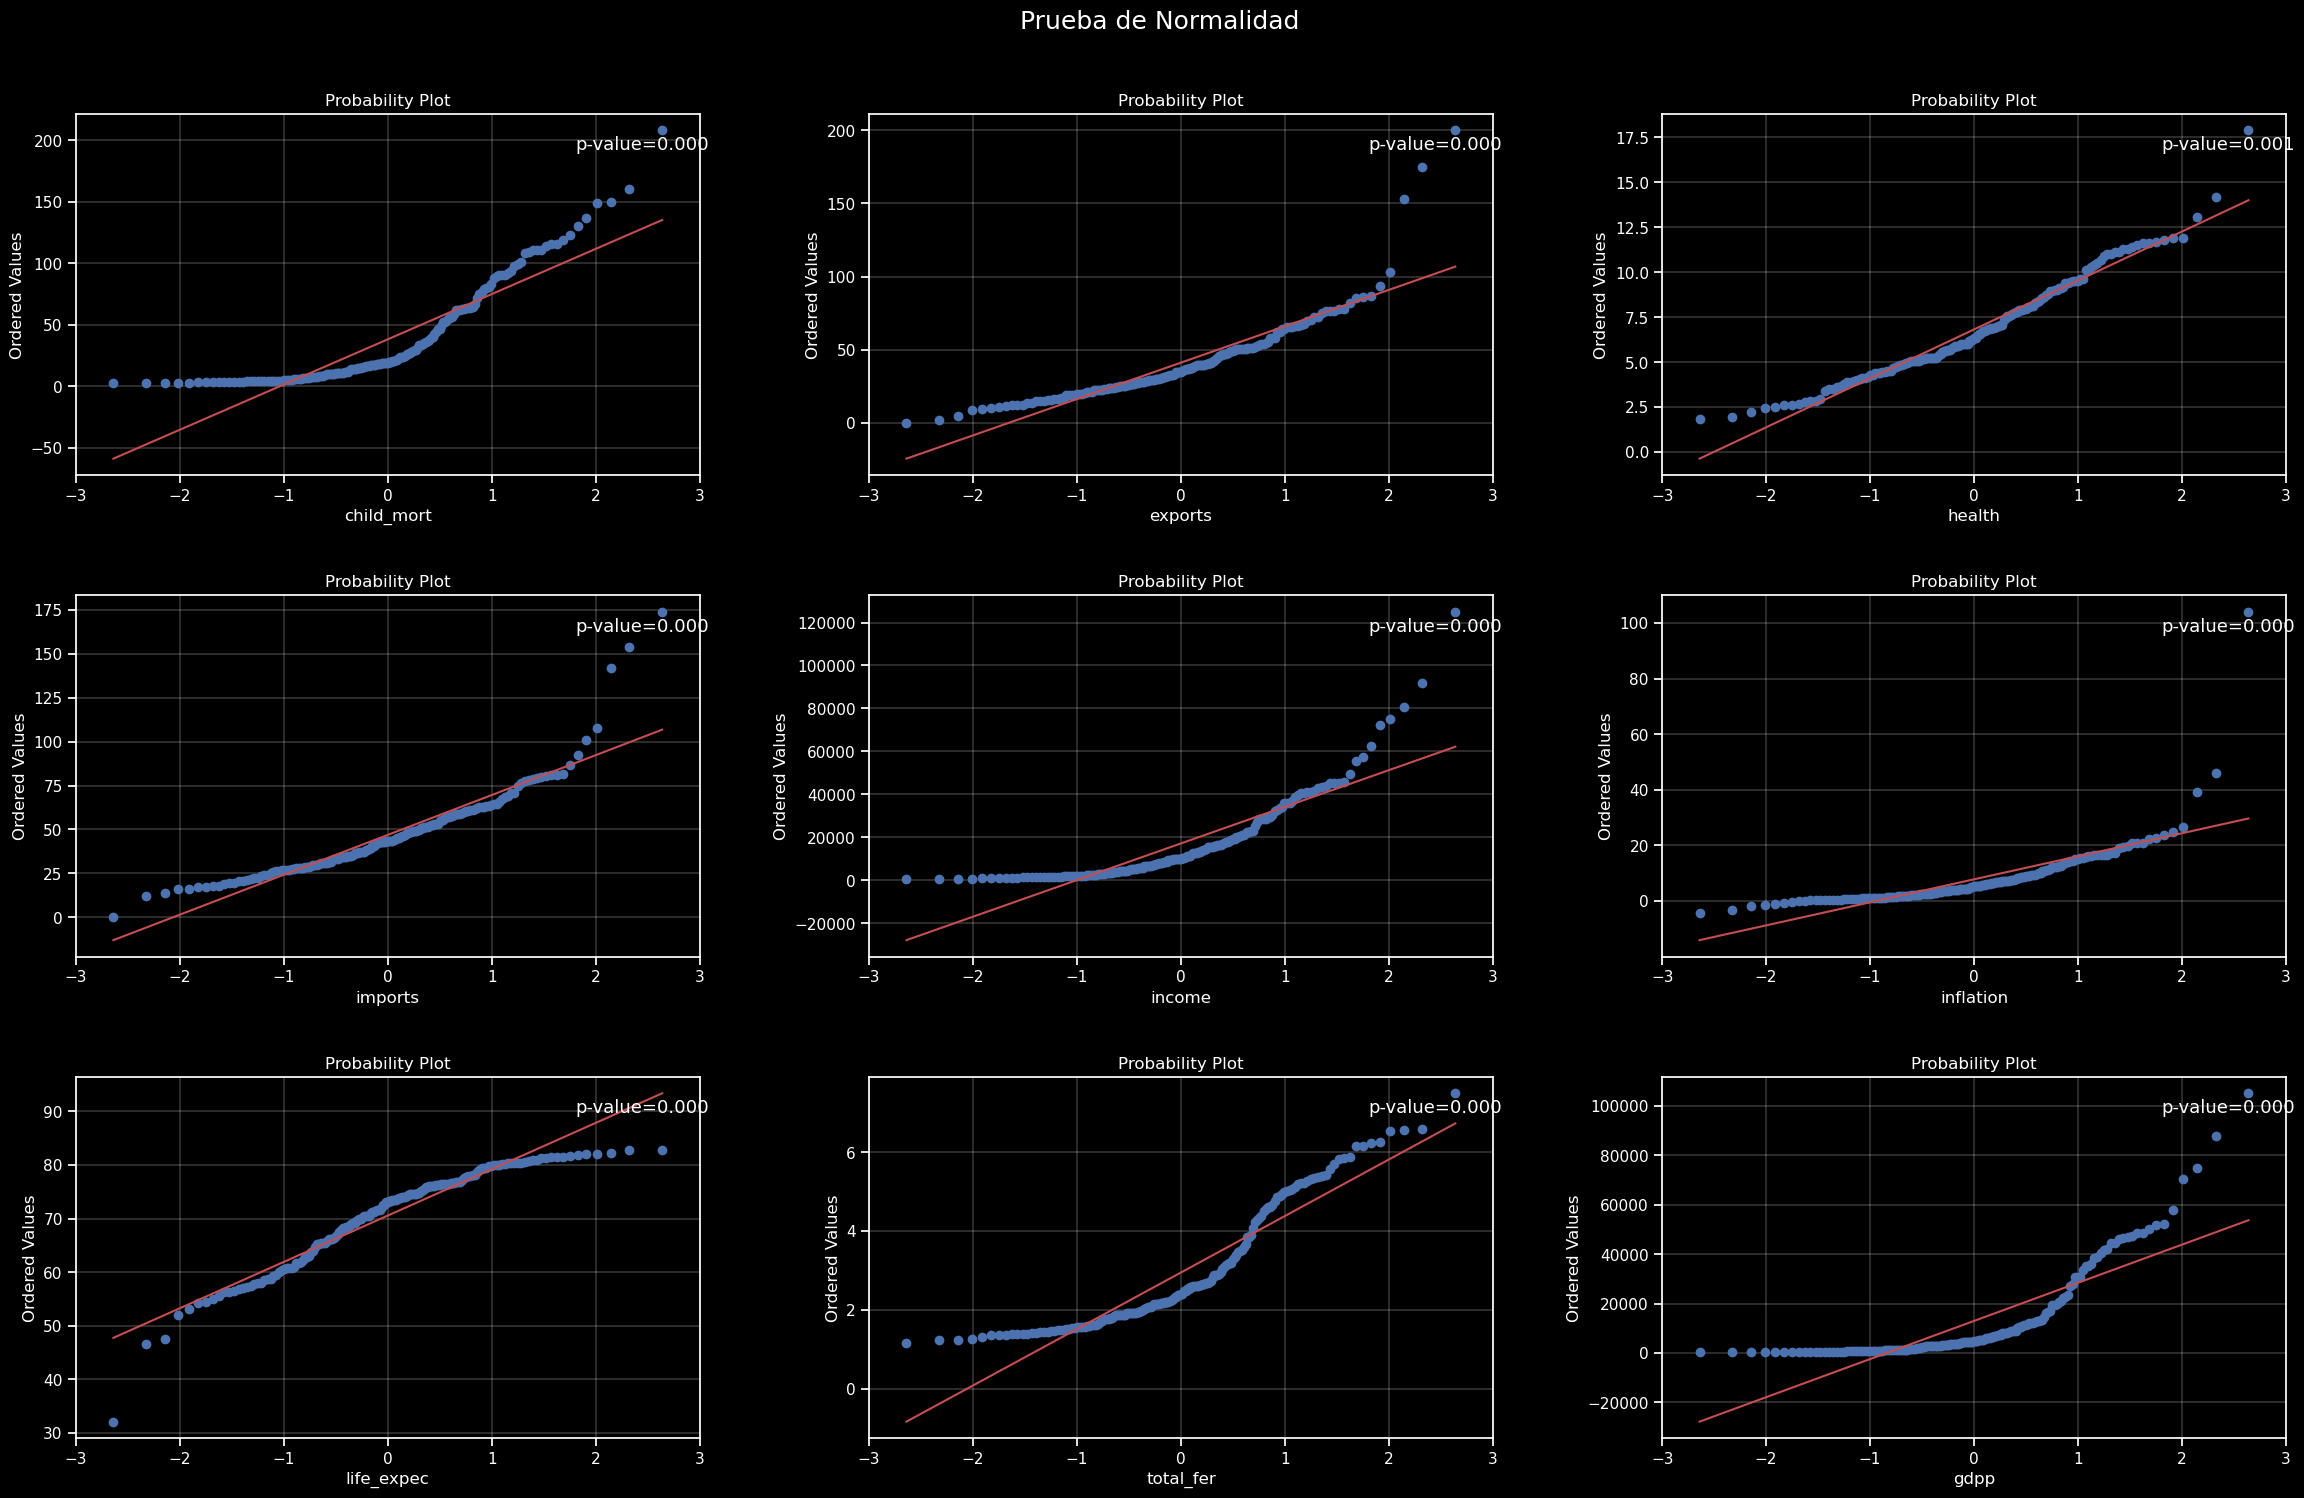

In [12]:
# Función para observar el comportamiento de las variables continuas en una prueba de normalidad
normality_test(data=data, variables=continuous)

---
---